**INTRODUCTION**

This notebook is used to anser research question connectted to the capstone project for the Data Science Nanodegree on Udacity.

I use the dataset provided by Our World in Data (https://github.com/owid/covid-19-data/tree/master/public/data). I started the project on 2021-11-26, hence, in order to be able to work with stable conclusions about the data, I use the dataset downloded on that day.

I want to answer several research questions about the COVID 19 Pandemic which you an read more about in the associated blog post: https://medium.com/p/d5ddaacce88d/edit

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

In [53]:
# Reading Data
data = pd.read_csv('owid-covid-data.csv')

In [54]:
# Data Exploration
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [55]:
data.shape

(135794, 67)

In [56]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

**NEW CHAPTER**

In the following I want to answer the research question on which countries are similar in terms of COVID metrics

In [57]:
germany = data[data['location']=='Germany']

In [115]:
france = data[data['location']=='France']

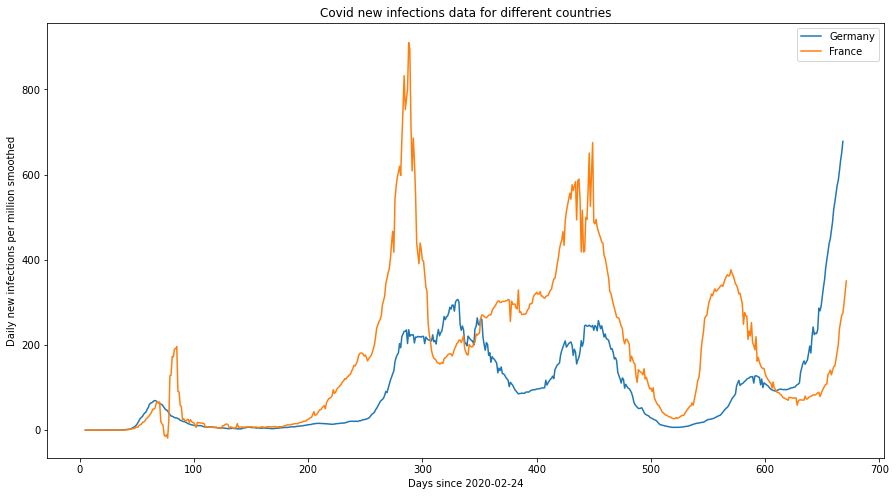

In [116]:
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(range(len(germany['date'])), germany['new_cases_smoothed_per_million']);
plt.plot(range(len(france['date'])), france['new_cases_smoothed_per_million']);
plt.xlabel('Days since 2020-02-24')
plt.ylabel('Daily new infections per million smoothed')
plt.title('Covid new infections data for different countries')
plt.legend(['Germany', 'France'])

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [117]:
# In order to perform correlation we must drop rows in the datasets where no value exists for the other
# I use the date as a measure for comparison

In [118]:
np.setdiff1d(germany['date'], france['date'], assume_unique=False)

array([], dtype=object)

all dates in country 1 are also included in country 2

In [119]:
np.setdiff1d(france['date'], germany['date'], assume_unique=False)

array(['2020-01-24', '2020-01-25', '2020-01-26'], dtype=object)

In [120]:
france.index[france['date'] == '2020-01-24'].tolist()

[42928]

In [121]:
france.index[france['date'] == '2020-01-25'].tolist()

[42929]

In [122]:
france.index[france['date'] == '2020-01-26'].tolist()

[42930]

these dates in country 1 are not included in country 2

In [123]:
france.shape

(672, 67)

In [124]:
# remove these rows
france.drop([42928, 42929, 42930] , axis = 0, inplace = True)


C:\Users\jakob\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [125]:
france.shape

(669, 67)

In [126]:
germany.shape

(669, 67)

In [ ]:
# find NaNs

In [ ]:
# now pearson correlation

In [127]:
scipy.stats.pearsonr(germany['new_cases_smoothed_per_million'], france['new_cases_smoothed_per_million'])

ValueError: array must not contain infs or NaNs